In [5]:
import torch
import torch_geometric.data as data
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
import networkx as nx

<h4>Data Structure</h4>

Data(x=[5, 2], edge_index=[2, 12])


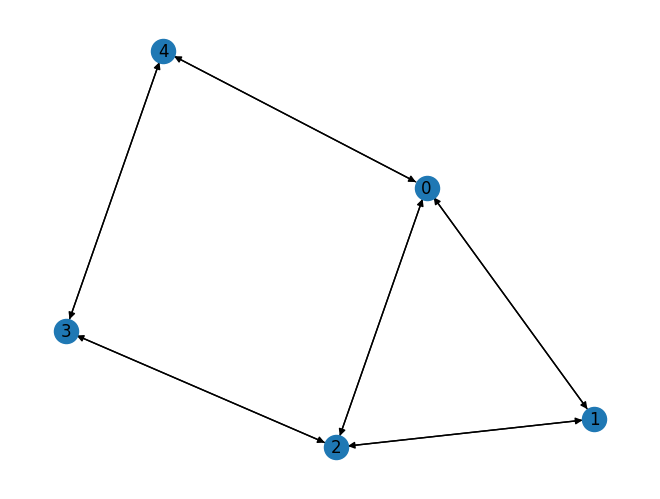

In [23]:
edge_index = torch.LongTensor([[0,0,0,1,1,2,2,2,3,3,4,4],
                               [1,2,4,0,2,1,0,3,2,4,3,0]])
x = torch.ones(5,2)
g = data.Data(edge_index=edge_index, x=x)
print(g)

gD = to_networkx(g)
nx.draw(gD, with_labels=gD.nodes)
plt.show()

In [24]:
print(g.num_nodes, g.num_edges)
print(g.keys)
print(g.num_node_features)
print(g.is_undirected())
print(g.has_isolated_nodes())

5 12
['edge_index', 'x']
2
True
False


In [25]:
torch.save(g, "data/graph_data1.pt")
g = torch.load("data/graph_data1.pt")
print(g)
g.edge_index

Data(x=[5, 2], edge_index=[2, 12])


tensor([[0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4],
        [1, 2, 4, 0, 2, 1, 0, 3, 2, 4, 3, 0]])

<h4>Degree</h4>

In [26]:
from torch_geometric.utils import degree
print(degree(g.edge_index[0]))
print(degree(g.edge_index[1]))

tensor([3., 2., 3., 2., 2.])
tensor([3., 2., 3., 2., 2.])


<h4>Add and Remove Self-loop</h4>

In [30]:
from torch_geometric.utils import contains_self_loops, remove_self_loops, add_self_loops, add_remaining_self_loops
print(contains_self_loops(g.edge_index))
edge_index, _ = add_self_loops(g.edge_index)
print(edge_index)

edge_index, _ = add_remaining_self_loops(edge_index)
print(edge_index)

edge_inex, _ = remove_self_loops(edge_index)
print(edge_inex)

False
tensor([[0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4, 0, 1, 2, 3, 4],
        [1, 2, 4, 0, 2, 1, 0, 3, 2, 4, 3, 0, 0, 1, 2, 3, 4]])
tensor([[0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4, 0, 1, 2, 3, 4],
        [1, 2, 4, 0, 2, 1, 0, 3, 2, 4, 3, 0, 0, 1, 2, 3, 4]])
tensor([[0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4],
        [1, 2, 4, 0, 2, 1, 0, 3, 2, 4, 3, 0]])


<h4>Subgraph Retrieve</h4>

[0, 1, 2]


/home/kris/anaconda3/envs/GNN/lib/python3.8/site-packages/torch_geometric/data/storage.py:280: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


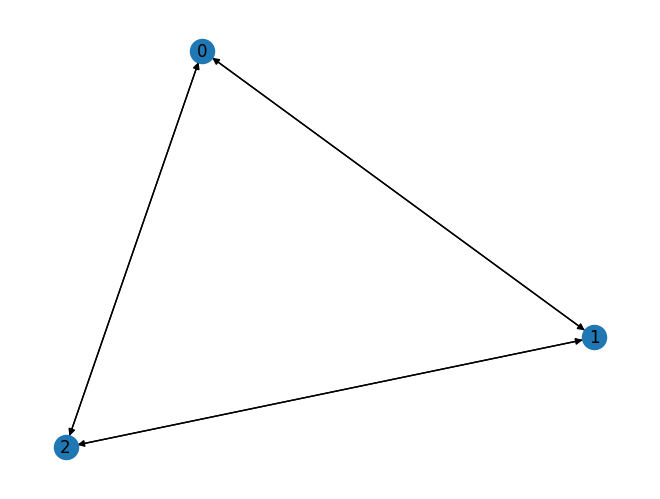

In [32]:
from torch_geometric.utils import subgraph

def draw(edge_index):
    graph = data.Data(edge_index=edge_index)
    graph = to_networkx(graph)
    print(graph.nodes)
    nx.draw(graph, with_labels=graph.nodes)
    plt.show()
    
edge_index, _ = subgraph(subset= torch.LongTensor([0,1,2]), edge_index=g.edge_index)
draw(edge_index)                         

<h4>To Undirected Graph</h4>

In [35]:
from torch_geometric.utils import to_undirected
edge_index = torch.LongTensor([[0,0],
                              [1,2]])
edge_index = to_undirected(edge_index)
print(edge_index)

tensor([[0, 0, 1, 2],
        [1, 2, 0, 0]])
